In [26]:
from mdsampler.sampler import Sampler
from pymatgen.core import Lattice, Structure

## Initialize the MD sampler

In [27]:
sampler = Sampler()

## Create dummy structures NaCl and KCl (lattice params are incorrect)

In [28]:
lattice = Lattice.cubic(4)
species = ["Na", "Cl"]
coords = [[0, 0, 0], [0.5, 0.5, 0.5]]
NaCl = Structure(lattice, species, coords)

lattice = Lattice.cubic(5)
species = ["K", "Cl"]
coords = [[0, 0, 0], [0.5, 0.5, 0.5]]
KCl = Structure(lattice, species, coords)

### create 20 slightly-perturbed structures for NaCl and KCl, one sevrely-strained KCL to structure list

In [65]:
structures = []
for i in range(20):
    struc = NaCl.copy()
    struc.perturb(distance=0.1)
    structures.append(struc)
for i in range(20):
    struc = KCl.copy()
    struc.perturb(distance=0.1)
    structures.append(struc)

struc = KCl.copy()
struc.apply_strain([0.5, 0.5, 0.5])
structures.append(struc)

## Sample 3 structures using the MD sampler with only one line

In [66]:
sampled_structures, wcss = sampler.sample_structures(structures=structures, num_out=3)
print(f"We have sampled {len(sampled_structures)} structures")

wcss = 0.09252975881099701
returned the [36, 6, 40] structures
We have sampled 3 structures


### WCSS stands for "Within Cluster Sum of Squares". 
###  It's a measure used in k-means clustering and other similar algorithms to evaluate the quality of the clustering. Here, the smaller means the better coverage of selected structures as a statistical representative for the original input distribution.
### In practice, you should use WCSS to check whether the number of selected structures can present a good coverage of the input structure list

In [70]:
test_num_outs, wcss_list = sampler.get_wcss_list(
    structures=structures, test_num_outs=[1, 2, 3, 4, 5, 10, 15]
)
print(wcss_list)

[4.248727798461914, 2.4733757972717285, 0.09252975881099701, 0.046658698469400406, 0.021322229877114296, 0.012937606312334538, 0.001875347108580172]


In [60]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

font = {"family": "arial", "weight": "normal", "size": 18}

matplotlib.rc("font", **font)

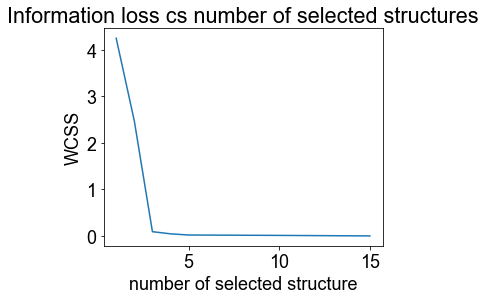

In [71]:
fig = plt.figure(figsize=((5, 4)))
ax = fig.add_subplot()
ax.set_title(r"Information loss cs number of selected structures")
ax.set_xlabel("number of selected structure")
ax.set_ylabel("WCSS")

ax.plot(test_num_outs, wcss_list)

### Note that the information loss is almost zero starting at x=3. This is because we have selected the 3 most representative structures: NaCl, KCl and strained KCl